In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Preprocessing and modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)

# For imbalance handling
from imblearn.over_sampling import SMOTE

# Saving models
import joblib



In [2]:
# Load the dataset
df = pd.read_csv('data/SyriaTel customer churn.csv') 


In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df.shape

(3333, 21)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# Show column names
df.columns

# Dataset shape
df.shape

# Data types and null checks
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [11]:
df.drop(['phone number'], axis=1, inplace=True)


In [12]:
# Map binary categorical to 0/1
df['international plan'] = df['international plan'].map({'no': 0, 'yes': 1})
df['voice mail plan'] = df['voice mail plan'].map({'no': 0, 'yes': 1})
df['churn'] = df['churn'].astype(int)  # True → 1, False → 0


In [13]:
df = pd.get_dummies(df, columns=['state', 'area code'], drop_first=True)


In [14]:

# Define columns to scale
num_cols = [
    'account length', 'number vmail messages',
    'total day minutes', 'total day calls', 'total day charge',
    'total eve minutes', 'total eve calls', 'total eve charge',
    'total night minutes', 'total night calls', 'total night charge',
    'total intl minutes', 'total intl calls', 'total intl charge',
    'customer service calls'
]

# Initialize scaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [15]:
# Check data types and first few rows
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   float64
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   float64
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   float64
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   float64
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   float64
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,0.676489,0,1,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,...,False,False,False,False,False,False,False,False,True,False
1,0.149065,0,1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,...,False,False,False,False,False,False,False,False,True,False
2,0.902529,0,0,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,...,False,False,False,False,False,False,False,False,True,False
3,-0.428590,1,0,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,...,False,False,False,False,False,False,False,False,False,False
4,-0.654629,1,0,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,...,False,False,False,False,False,False,False,False,True,False


In [16]:
# Value counts and proportions
df['churn'].value_counts(normalize=True)


churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64

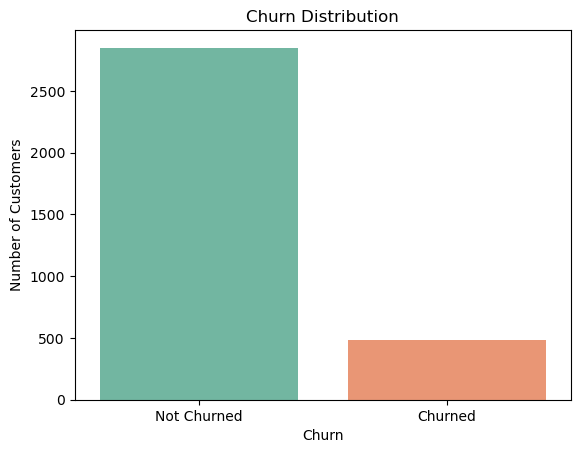

In [17]:
# Plot churn distribution
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.ylabel('Number of Customers')
plt.xlabel('Churn')
plt.show()


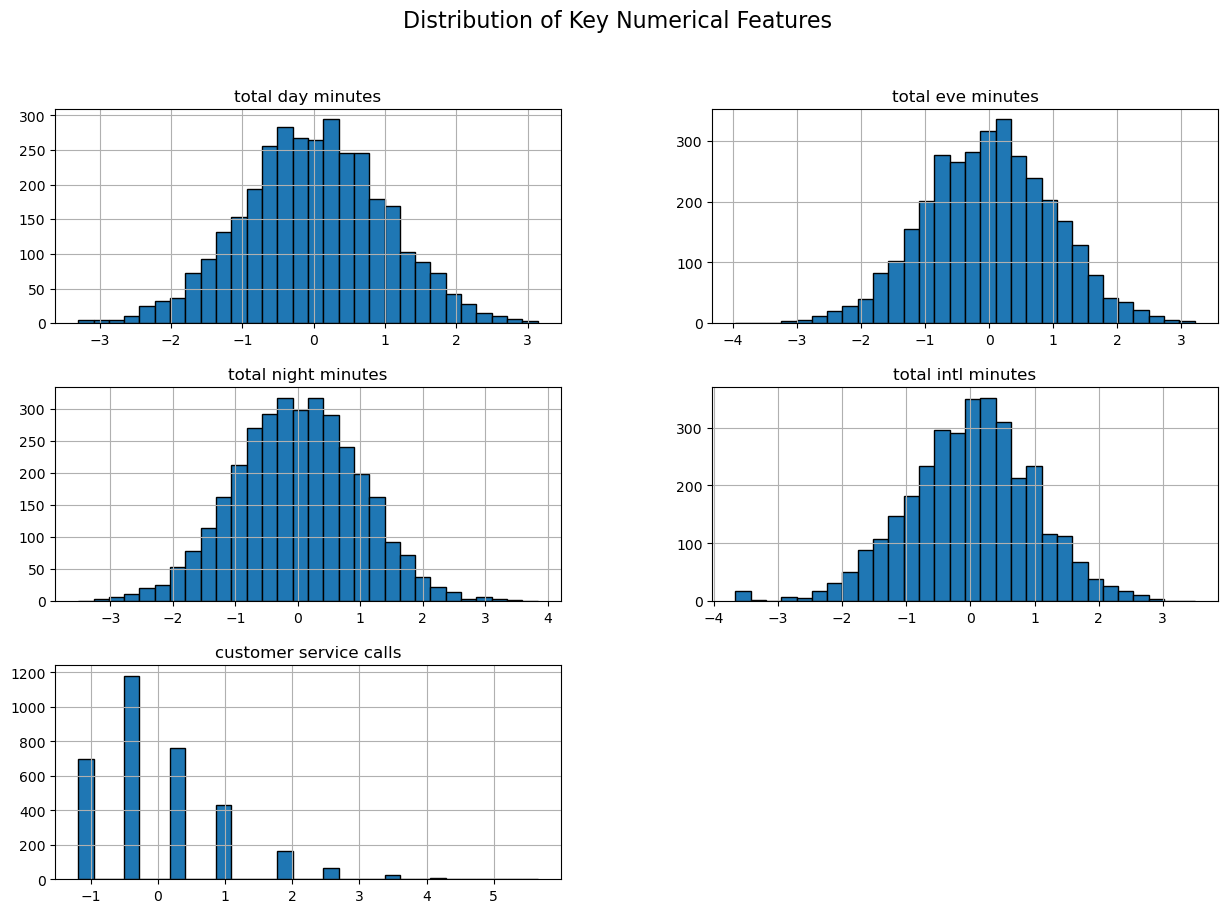

In [18]:
num_cols = [
    'total day minutes', 'total eve minutes', 'total night minutes',
    'total intl minutes', 'customer service calls'
]

# Plot histograms
df[num_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Key Numerical Features', fontsize=16)
plt.show()


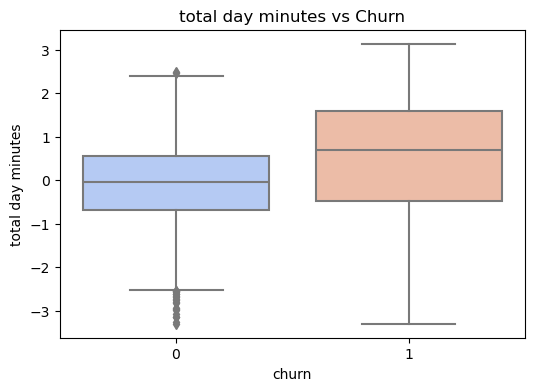

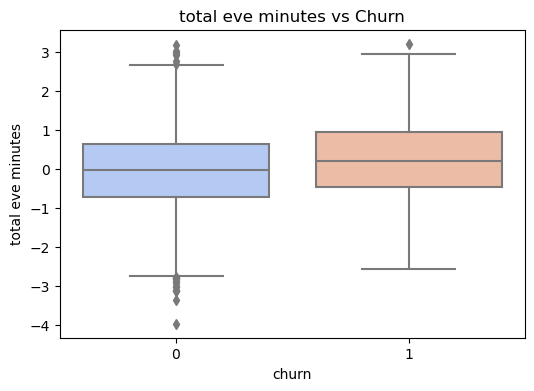

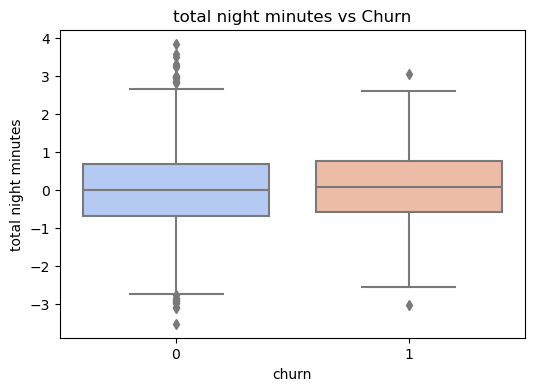

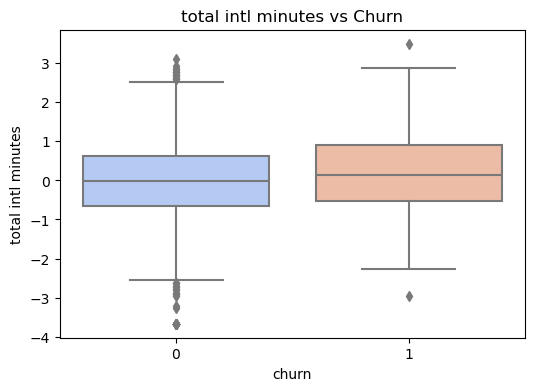

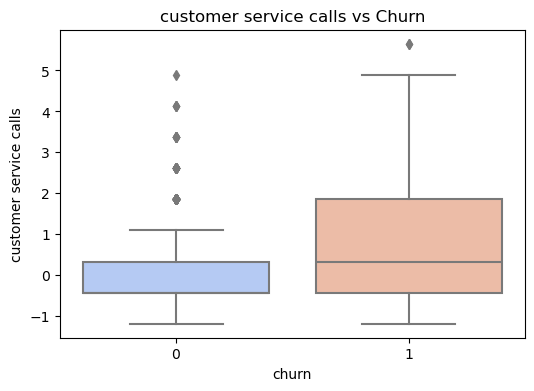

In [19]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='churn', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Churn')
    plt.show()


AttributeError: 'numpy.int32' object has no attribute 'startswith'

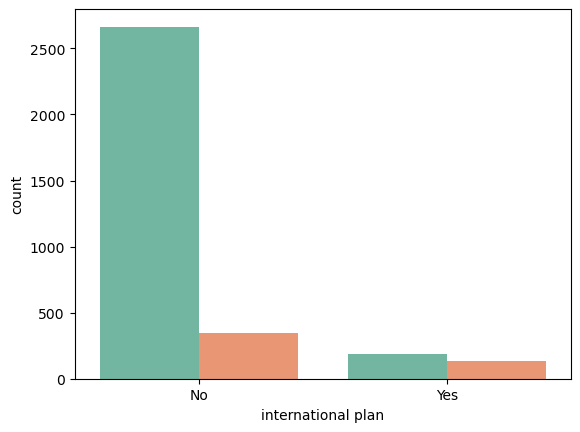

In [20]:
# Restore readable labels for plotting
df_plot = df.copy()
df_plot['international plan'] = df_plot['international plan'].map({0: 'No', 1: 'Yes'})
df_plot['voice mail plan'] = df_plot['voice mail plan'].map({0: 'No', 1: 'Yes'})

# Bar plots
sns.countplot(data=df_plot, x='international plan', hue='churn', palette='Set2')
plt.title('Churn by International Plan')
plt.show()

sns.countplot(data=df_plot, x='voice mail plan', hue='churn', palette='Set2')
plt.title('Churn by Voice Mail Plan')
plt.show()


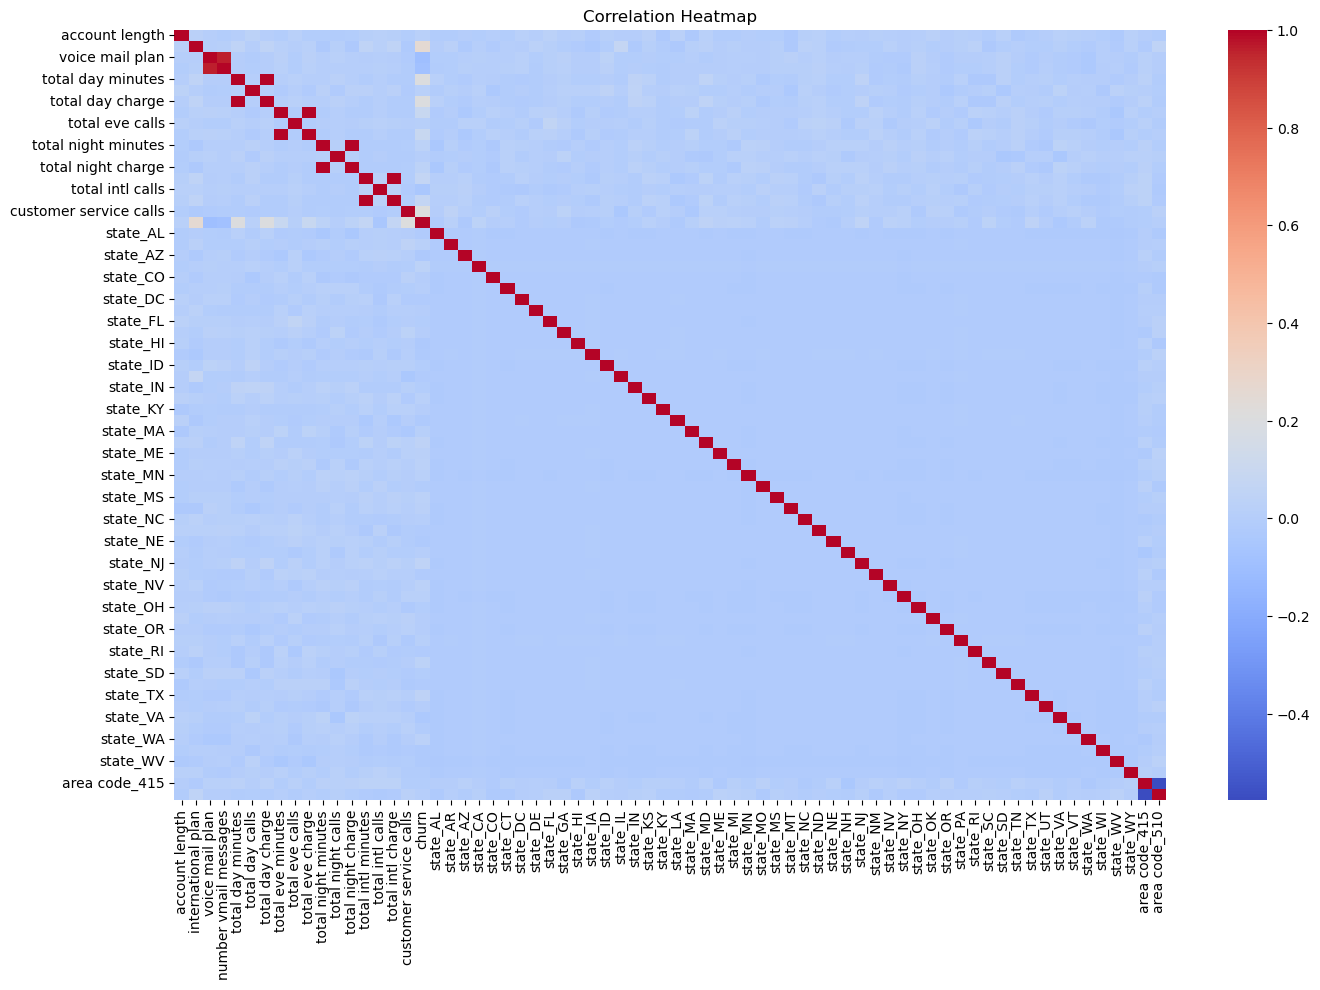

In [21]:
# Only use numeric features for correlation
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [22]:
df.drop([
    'total day charge', 'total eve charge', 
    'total night charge', 'total intl charge'
], axis=1, inplace=True)


In [24]:
# 1. Create 'total calls'
df['total calls'] = (
    df['total day calls'] + df['total eve calls'] +
    df['total night calls'] + df['total intl calls']
)

# 2. Create 'total minutes'
df['total minutes'] = (
    df['total day minutes'] + df['total eve minutes'] +
    df['total night minutes'] + df['total intl minutes']
)

# 3. Create 'avg charge per call' before dropping charge columns
df['avg charge per call'] = (
    df[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']].sum(axis=1) /
    df['total calls'].replace(0, 1)
)

# 4. Now drop the original charge columns
df.drop([
    'total day charge', 'total eve charge', 
    'total night charge', 'total intl charge'
], axis=1, inplace=True)

# 5. Optionally drop original minute & call columns (since we have totals now)
df.drop([
    'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes',
    'total day calls', 'total eve calls', 'total night calls', 'total intl calls'
], axis=1, inplace=True)


KeyError: "None of [Index(['total day charge', 'total eve charge', 'total night charge',\n       'total intl charge'],\n      dtype='object')] are in the [columns]"